## Predicting Tamil Bigg Boss (பிக் பாஸ் தமிழ்) Season 4 Winner

## Using Python scikit learn https://satya-python.blogspot.com/

### Importing Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

### Check and import dataset

In [2]:
!cd /kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada; ls -tlr

total 76
-rw-r--r-- 1 nobody nogroup 74464 Oct 12 15:07 Bigg_Boss_India.csv


In [3]:
bigg_boss = pd.read_csv('/kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada/Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 618 rows and 22 columns


## Exploratory Data Analysis (EDA)

In [4]:
bigg_boss.head(5)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,03-Nov-06,NaN,10.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0
1,Hindi,1,Anupama Verma,Model,Female,03-Nov-06,NaN,5.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,03-Nov-06,NaN,4.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,03-Nov-06,NaN,1.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
4,Hindi,1,Carol Gracias,Model,Female,03-Nov-06,26-Jan-07,12.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,0,Sony TV,2.72,6.0,0.0,0.0,NaN,0.0


In [5]:
bigg_boss.tail(10).T

,608,609,610,611,612,613,614,615,616,617
Language,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam
Season Number,2,2,2,2,2,2,2,2,2,2
Name,Sujo Mathew,Suresh Krishnan,Thesni Khan,Veena Nair,Daya Ashwathy/Achu,Jazla Madassery,Pavan Gino Thomas,Sooraj,Abhirami Suresh,Amrutha Suresh
Profession,Model,Film Director,Actress,Actress,Social Media Star,Activist,Model,Radio Jockey,Actress,Singer
Gender,Male,Male,Female,Female,Female,Female,Male,Male,Female,Female
Entry Date,05-Jan-20,05-Jan-20,05-Jan-20,05-Jan-20,26-Jan-20,26-Jan-20,NaN,NaN,NaN,NaN
Elimination Date,NaN,26-Jan-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,NaN,3,4,NaN,NaN,8,NaN,8,NaN,NaN
Wild Card,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes
Season Length,105,105,105,105,105,105,105,105,105,105


In [6]:
bigg_boss.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
552,Bengali,1,Mahesh Jalan,Astrologer,Male,17-Jun-13,NaN,5.0,No,90,15,17-Jun-13,14-Sep-13,Mithun Chakraborthy,0,ETV Bangla,2.90,NaN,NaN,NaN,NaN,0.0
567,Bengali,2,Mainak Banerjee,Actor,Male,04-Apr-16,NaN,NaN,No,97,15,04-Apr-16,15-Jul-16,Jeet,0,Colors Bangla,6.50,NaN,NaN,NaN,NaN,0.0
279,Kannada,3,Huccha Venkat,Actor,Male,25-Oct-15,NaN,NaN,No,98,18,25-Oct-15,31-Jan-16,Sudeep,0,Colors Kannada,NaN,0.0,0.0,0.0,NaN,0.0
581,Malayalam,1,Basheer Bashi,Actor,Male,24-Jun-18,NaN,12.0,No,98,18,24-Jun-18,30-Sep-18,Mohanlal,0,Asianet,10.33,2.0,0.0,1.0,NaN,0.0
394,Telugu,2,Ganesh,Commoner - RJ,Male,10-Jun-18,NaN,11.0,No,112,18,10-Jun-18,30-Sep-18,Nani,0,Star Maa,NaN,9.0,0.0,0.0,NaN,0.0
493,Tamil,3,Vanitha Vijayakumar,Actress,Female,23-Jun-19,NaN,12.0,No,105,17,23-Jun-19,06-Oct-19,Kamal Haasan,0,Start Vijay,8.80,3.0,1.0,2.0,NaN,0.0
57,Hindi,4,Shweta Tiwari,Soap Actress,Female,03-Oct-10,NaN,NaN,No,96,16,03-Oct-10,08-Jan-11,Salman Khan,"1,00,00,000",Colors,4.95,4.0,0.0,2.0,NaN,1.0
124,Hindi,8,Natasa Stankovic,Model,Female,21-Sep-14,NaN,4.0,No,105,19,21-Sep-14,03-Jan-15,Salman Khan/Farah Khan,0,Colors,3.77,2.0,0.0,0.0,NaN,0.0
249,Kannada,1,Arun Sagar,Art Director,Male,24-Mar-13,30-Jun-13,14.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,0,ETV Kannada,4.70,5.0,0.0,NaN,NaN,0.0
43,Hindi,3,Vinod Kambli,Sports Person,Male,NaN,NaN,6.0,Yes,84,15,04-Oct-09,26-Dec-09,Amitabh Bachchan,0,Colors,2.83,1.0,0.0,0.0,NaN,0.0


In [7]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 22 columns):
Language                              618 non-null object
Season Number                         618 non-null int64
Name                                  618 non-null object
Profession                            618 non-null object
Gender                                618 non-null object
Entry Date                            536 non-null object
Elimination Date                      112 non-null object
Elimination Week Number               483 non-null float64
Wild Card                             618 non-null object
Season Length                         618 non-null int64
Number of Housemates                  618 non-null int64
Season Start Date                     618 non-null object
Season End Date                       588 non-null object
Host Name                             618 non-null object
Prize Money (INR)                     569 non-null object
Broadcasted By             

In [8]:
bigg_boss.describe()

,Season Number,Elimination Week Number,Season Length,Number of Housemates,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
count,618.000000,483.000000,618.000000,618.000000,375.000000,554.000000,530.000000,529.000000,40.000000,569.000000
mean,4.754045,9.026915,102.158576,17.970874,5.780187,3.824910,0.094340,0.536862,6.650000,0.054482
std,3.676244,4.760368,10.768107,2.293489,2.687312,2.753927,0.305226,0.758202,2.082282,0.227165
min,1.000000,1.000000,70.000000,11.000000,2.720000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.000000,5.000000,98.000000,16.000000,3.540000,1.000000,0.000000,0.000000,5.000000,0.000000
50%,4.000000,9.000000,105.000000,18.000000,4.700000,3.000000,0.000000,0.000000,7.000000,0.000000
75%,7.000000,14.000000,105.000000,20.000000,8.200000,6.000000,0.000000,1.000000,8.000000,0.000000
max,14.000000,20.000000,140.000000,23.000000,11.030000,13.000000,2.000000,5.000000,10.000000,1.000000


In [9]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 14
Number of unique values in Name - 615
Number of unique values in Profession - 74
Number of unique values in Gender - 3
Number of unique values in Entry Date - 44
Number of unique values in Elimination Date - 62
Number of unique values in Elimination Week Number - 19
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 13
Number of unique values in Number of Housemates - 9
Number of unique values in Season Start Date - 35
Number of unique values in Season End Date - 31
Number of unique values in Host Name - 15
Number of unique values in Prize Money (INR) - 4
Number of unique values in Broadcasted By - 11
Number of unique values in Average TRP - 20
Number of unique values in Number of Evictions Faced - 14
Number of unique values in Number of re-entries - 3
Number of unique values in Number of times elected as Captain - 6
Number of unique values in Social Media Popularity -

In [10]:
# Number of seasons in all Indian languages
print(bigg_boss.groupby('Language')['Season Number'].nunique().sum())

# 35 seasons happened (including current seasons)

35


## https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

## Bigg Boss Hindi has many seasons compared to other Indian languages. So, number of housemates are more in Hindi.

In [11]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi        14
Kannada       7
Tamil         4
Telugu        4
Bengali       2
Malayalam     2
Marathi       2
Name: Season Number, dtype: int64


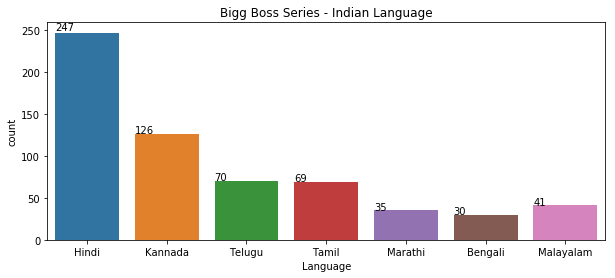

In [12]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## In Bigg Boss India seasons, most of the housemates (84%) entered in first day/week

No     523
Yes     95
Name: Wild Card, dtype: int64 

No     85.0
Yes    15.0
Name: Wild Card, dtype: float64


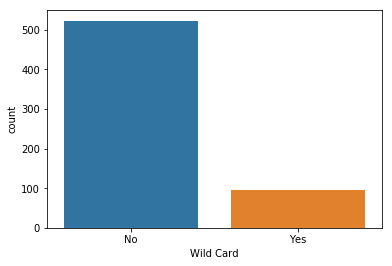

In [13]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100))
sns.countplot(x='Wild Card', data=bigg_boss)

## Number of film actresses entered into the Bigg Boss houses, are more when compared to other professions 

Actress                      142
Actor                        103
Model                         48
Soap Actress                  44
Singer                        36
                            ... 
Commoner - Singer              1
Writer                         1
Commoner - Dubbing Artist      1
Commoner - Police              1
Commoner - Farmer              1
Name: Profession, Length: 74, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text xticklabel objects>)

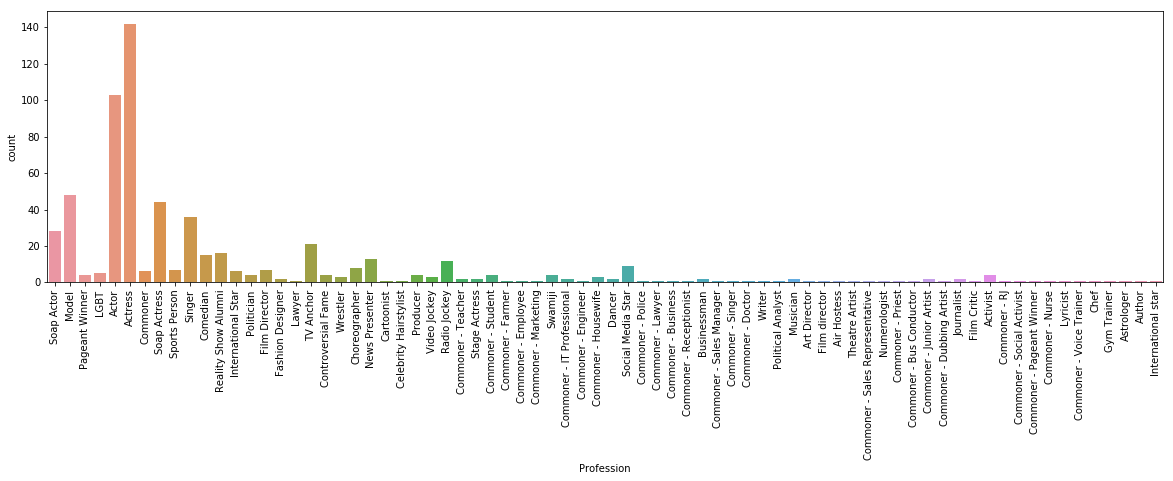

In [14]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(20,5))
sns.countplot(x='Profession', data=bigg_boss)
plt.xticks(rotation=90)

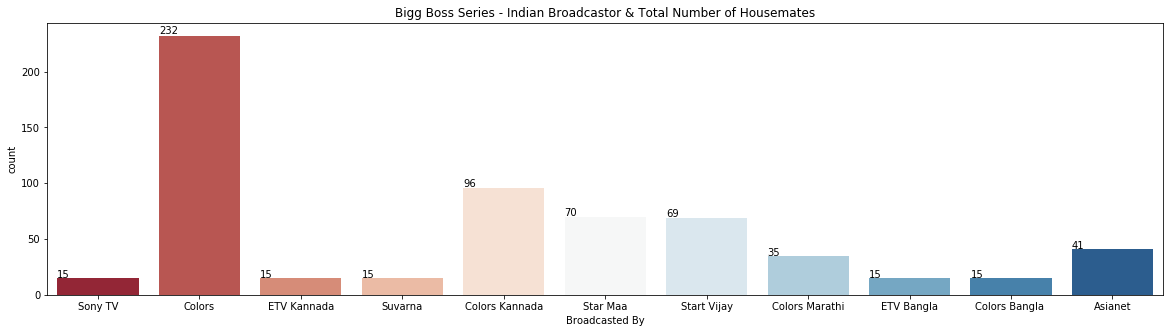

In [15]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## Salman Khan hosted most number of seasons (in Bigg Boss Hindi), Sudeep is next in the list

In [16]:
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan                9
Sudeep                     7
Kamal Haasan               4
Mahesh Manjrekar           2
Mohanlal                   2
Nagarjuna                  2
Amitabh Bachchan           1
Arshad Warsi               1
Jeet                       1
Jr. NTR                    1
Mithun Chakraborthy        1
Nani                       1
Salman Khan/Farah Khan     1
Salman Khan/Sanjay Dutt    1
Shilpa Shetty              1
Name: Season Number, dtype: int64

## In all Bigg Boss languages, and in all seasons, Female contestants are more

In [17]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts())


Female         322
Male           291
Transgender      5
Name: Gender, dtype: int64


### Only 5 Transgenders participated in all Indian languages

In [18]:
# Maximum TRP of Bigg Boss Hindi/India seasons
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 11.03 

  Language  Season Number
 Malayalam              2


## https://satya-data.blogspot.com/2018/01/bigg-boss-data-set-bigg-boss.html

In [19]:
# All BB Winners
bigg_boss.loc[bigg_boss.Winner==1]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
8,Hindi,1,Rahul Roy,Actor,Male,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,"1,00,00,000",Sony TV,2.72,4.0,0.0,0.0,NaN,1.0
16,Hindi,2,Ashutosh Kaushik,Reality Show Alumni,Male,17-Aug-08,NaN,NaN,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,"1,00,00,000",Colors,2.89,4.0,0.0,0.0,NaN,1.0
42,Hindi,3,Vindu Dara Singh,Actor,Male,04-Oct-09,NaN,NaN,No,84,15,04-Oct-09,26-Dec-09,Amitabh Bachchan,"1,00,00,000",Colors,2.83,7.0,0.0,0.0,NaN,1.0
57,Hindi,4,Shweta Tiwari,Soap Actress,Female,03-Oct-10,NaN,NaN,No,96,16,03-Oct-10,08-Jan-11,Salman Khan,"1,00,00,000",Colors,4.95,4.0,0.0,2.0,NaN,1.0
62,Hindi,5,Juhi Parmar,Soap Actress,Female,02-Oct-11,NaN,NaN,No,98,18,02-Oct-11,07-Jan-12,Salman Khan/Sanjay Dutt,"1,00,00,000",Colors,4.19,4.0,0.0,1.0,NaN,1.0
92,Hindi,6,Urvashi Dholakia,Soap Actress,Female,07-Oct-12,NaN,NaN,No,97,19,07-Oct-12,12-Jan-13,Salman Khan,"50,00,000",Colors,3.81,6.0,0.0,1.0,NaN,1.0
102,Hindi,7,Gauhar Khan,Actress,Female,15-Sep-13,NaN,NaN,No,105,20,15-Sep-13,28-Dec-13,Salman Khan,"50,00,000",Colors,4.40,7.0,0.0,2.0,NaN,1.0
121,Hindi,8,Gautam Gulati,Actor,Male,21-Sep-14,NaN,NaN,No,105,19,21-Sep-14,03-Jan-15,Salman Khan/Farah Khan,"50,00,000",Colors,3.77,10.0,0.0,1.0,NaN,1.0
144,Hindi,9,Prince Narula,Reality Show Alumni,Male,11-Oct-15,NaN,NaN,No,105,20,11-Oct-15,23-Jan-16,Salman Khan,"50,00,000",Colors,2.90,6.0,0.0,4.0,NaN,1.0
165,Hindi,10,Manveer Gurjar,Commoner - Farmer,Male,16-Oct-16,NaN,NaN,No,105,18,16-Oct-16,28-Jan-17,Salman Khan,"50,00,000",Colors,3.54,7.0,0.0,4.0,8.0,1.0


In [20]:
# Profession of BB Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actor                  7
Actress                5
Soap Actress           4
Singer                 4
Reality Show Alumni    3
TV Anchor              2
Soap Actor             2
Commoner               1
Film Director          1
Model                  1
Commoner - Farmer      1
Name: Profession, dtype: int64

In [21]:
# Gender of Season title Winners
bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts()

# Male      22
# Female     9

Male      22
Female     9
Name: Gender, dtype: int64

In [22]:
# Number of eliminations or evictions faced by the Bigg Boss competition winners
bigg_boss.loc[bigg_boss.Winner==1,'Number of Evictions Faced'].value_counts().sort_index()

4.0     7
5.0     3
6.0     5
7.0     5
8.0     1
9.0     3
10.0    1
11.0    2
12.0    1
Name: Number of Evictions Faced, dtype: int64

## No wild card entry housemate won the Bigg Boss competition.

In [23]:
# Entry type of the Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Wild Card'].value_counts()

No    31
Name: Wild Card, dtype: int64

In [24]:
# No re-entered contestant won Bigg Boss title
bigg_boss.loc[bigg_boss.Winner==1,'Number of re-entries'].value_counts()

0.0    28
Name: Number of re-entries, dtype: int64

In [25]:
# Bigg Boss title winner number of times elected as Captain
bigg_boss.loc[bigg_boss.Winner==1,'Number of times elected as Captain'].value_counts().sort_index()

0.0    6
1.0    9
2.0    9
3.0    1
4.0    2
Name: Number of times elected as Captain, dtype: int64

## BB Tamil Seasons

In [26]:
bigg_boss.loc[(bigg_boss['Language']=='Tamil')]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
443,Tamil,1,Aarav Nafeez,Model,Male,25-Jun-17,NaN,NaN,No,98,19,25-Jun-17,30-Sep-17,Kamal Haasan,"50,00,000",Start Vijay,7.8,7.0,0.0,1.0,7.0,1.0
444,Tamil,1,Anuya Bhagvath,Actress,Female,25-Jun-17,NaN,1.0,No,98,19,25-Jun-17,30-Sep-17,Kamal Haasan,0,Start Vijay,7.8,1.0,0.0,0.0,NaN,0.0
445,Tamil,1,Bharani,Actor,Male,25-Jun-17,NaN,2.0,No,98,19,25-Jun-17,30-Sep-17,Kamal Haasan,0,Start Vijay,7.8,1.0,0.0,0.0,NaN,0.0
446,Tamil,1,Ganesh Venkatraman,Actor,Male,25-Jun-17,30-Sep-17,14.0,No,98,19,25-Jun-17,30-Sep-17,Kamal Haasan,0,Start Vijay,7.8,6.0,0.0,1.0,NaN,0.0
447,Tamil,1,Ganja Karuppu,Comedian,Male,25-Jun-17,NaN,2.0,No,98,19,25-Jun-17,30-Sep-17,Kamal Haasan,0,Start Vijay,7.8,1.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Tamil,4,Shivani Narayanan,Soap Actress,Female,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
508,Tamil,4,Samyuktha Karthik,Actress,Female,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
509,Tamil,4,Somashekar,Model,Male,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
510,Tamil,4,Suresh Chakravarthy,Actor,Male,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,1.0,NaN,NaN


In [27]:
# Bigg Boss Tamil Winners
bigg_boss.loc[(bigg_boss['Language']=='Tamil') & (bigg_boss['Winner']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
443,Tamil,1,Aarav Nafeez,Model,Male,25-Jun-17,NaN,NaN,No,98,19,25-Jun-17,30-Sep-17,Kamal Haasan,"50,00,000",Start Vijay,7.8,7.0,0.0,1.0,7.0,1.0
472,Tamil,2,Riythvika,Actress,Female,17-Jun-18,NaN,NaN,No,105,17,17-Jun-18,30-Sep-18,Kamal Haasan,"50,00,000",Start Vijay,8.2,6.0,0.0,1.0,8.0,1.0
486,Tamil,3,Mugen Rao,Singer,Male,23-Jun-19,NaN,NaN,No,105,17,23-Jun-19,06-Oct-19,Kamal Haasan,"50,00,000",Start Vijay,8.8,4.0,0.0,2.0,8.0,1.0


In [28]:
# Bigg Boss Tamil current season participants
bigg_boss.loc[(bigg_boss['Language']=='Tamil') & (bigg_boss['Winner'].isnull()), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
496,Tamil,4,Aajeedh Khalique,Singer,Male,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
497,Tamil,4,Aari Arjuna,Actor,Male,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
498,Tamil,4,Anita Sampath,News Presenter,Female,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
499,Tamil,4,Bala Murugadoss,Model,Male,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
500,Tamil,4,Gabriella Charlton,Actress,Female,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
501,Tamil,4,Nisha Aranthangi,Comedian,Female,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
502,Tamil,4,Ramesh Jithan,Actor,Male,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
503,Tamil,4,Rekha,Actress,Female,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN
504,Tamil,4,Ramya Pandian,Actress,Female,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,1.0,NaN,NaN
505,Tamil,4,Rio Raj,Video Jockey,Male,04-Oct-20,NaN,NaN,No,105,16,04-Oct-20,17-Jan-21,Kamal Haasan,NaN,Start Vijay,NaN,NaN,NaN,NaN,NaN,NaN


## Preparing Data for ML modelling

In [29]:
# Handling NULL values
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                             82
Elimination Date                      506
Elimination Week Number               135
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                        30
Host Name                               0
Prize Money (INR)                      49
Broadcasted By                          0
Average TRP                           243
Number of Evictions Faced              64
Number of re-entries                   88
Number of times elected as Captain     89
Social Media Popularity               578
Winner                                 49
dtype: int64

In [30]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [31]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

In [32]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [33]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,10.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0
1,Hindi,1,Anupama Verma,Model,Female,2006-11-03,NaT,5.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,2006-11-03,NaT,4.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,2006-11-03,NaT,1.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
4,Hindi,1,Carol Gracias,Model,Female,2006-11-03,2007-01-26,12.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,0,Sony TV,2.72,6.0,0.0,0.0,NaN,0.0


In [34]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
613,Malayalam,2,Jazla Madassery,Activist,Female,2020-01-26,NaT,8.0,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,4.0,0.0,0.0,NaN,0.0
614,Malayalam,2,Pavan Gino Thomas,Model,Male,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,0.0,0.0,0.0,NaN,0.0
615,Malayalam,2,Sooraj,Radio Jockey,Male,NaT,NaT,8.0,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,0,Asianet,11.03,2.0,0.0,0.0,NaN,0.0
616,Malayalam,2,Abhirami Suresh,Actress,Female,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN
617,Malayalam,2,Amrutha Suresh,Singer,Female,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,Asianet,11.03,3.0,0.0,0.0,NaN,NaN


In [35]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
127,Hindi,8,Puneet Issar,Actor,Male,2014-09-21,2015-01-03,15.0,No,105,19,2014-09-21,2015-01-03,Salman Khan/Farah Khan,0,Colors,3.770000,7.0,1.0,1.0,NaN,0.0
115,Hindi,7,Ajaz Khan,Actor,Male,NaT,2013-12-28,15.0,Yes,105,20,2013-09-15,2013-12-28,Salman Khan,0,Colors,4.400000,7.0,0.0,0.0,NaN,0.0
484,Tamil,3,Losliya Mariyanesan,News Presenter,Female,2019-06-23,NaT,15.0,No,105,17,2019-06-23,2019-10-06,Kamal Haasan,0,Start Vijay,8.800000,6.0,0.0,1.0,NaN,0.0
579,Malayalam,1,Archana Suseelan,Actress,Female,2018-06-24,NaT,13.0,No,98,18,2018-06-24,2018-09-30,Mohanlal,0,Asianet,10.330000,5.0,0.0,1.0,NaN,0.0
50,Hindi,4,Hrishant Goswami,Model,Male,2010-10-03,NaT,8.0,No,96,16,2010-10-03,2011-01-08,Salman Khan,0,Colors,4.950000,3.0,0.0,1.0,NaN,0.0
94,Hindi,6,Vishal Karwal,Soap Actor,Male,NaT,NaT,11.0,Yes,97,19,2012-10-07,2013-01-12,Salman Khan,0,Colors,3.810000,5.0,0.0,0.0,NaN,0.0
114,Hindi,7,Vivek Mishra,Model,Male,NaT,NaT,6.0,Yes,105,20,2013-09-15,2013-12-28,Salman Khan,0,Colors,4.400000,1.0,0.0,0.0,NaN,0.0
557,Bengali,1,Sampurna Lahiri,Actress,Female,2013-06-17,NaT,6.0,No,90,15,2013-06-17,2013-09-14,Mithun Chakraborthy,0,ETV Bangla,2.900000,1.0,0.0,NaN,NaN,0.0
252,Kannada,1,Narendra Babu Sharma,TV Anchor,Male,2013-03-24,2013-06-30,14.0,No,98,15,2013-03-24,2013-06-30,Sudeep,0,ETV Kannada,4.700000,8.0,0.0,NaN,NaN,0.0
305,Kannada,4,Rekha,Actress,Female,2016-10-09,NaT,NaN,No,112,18,2016-10-09,2017-01-29,Sudeep,0,Colors Kannada,5.780187,1.0,0.0,NaN,NaN,0.0


In [36]:
test = bigg_boss.loc[(bigg_boss['Language']=='Tamil') & (bigg_boss['Winner'].isnull()), :]
test

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
496,Tamil,4,Aajeedh Khalique,Singer,Male,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN
497,Tamil,4,Aari Arjuna,Actor,Male,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN
498,Tamil,4,Anita Sampath,News Presenter,Female,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN
499,Tamil,4,Bala Murugadoss,Model,Male,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN
500,Tamil,4,Gabriella Charlton,Actress,Female,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN
501,Tamil,4,Nisha Aranthangi,Comedian,Female,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN
502,Tamil,4,Ramesh Jithan,Actor,Male,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN
503,Tamil,4,Rekha,Actress,Female,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN
504,Tamil,4,Ramya Pandian,Actress,Female,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,1.0,NaN,NaN
505,Tamil,4,Rio Raj,Video Jockey,Male,2020-10-04,NaT,NaN,No,105,16,2020-10-04,2021-01-17,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN,NaN


In [37]:
BB_tamil_participant = test[['Name']]
BB_tamil_participant.reset_index(drop=True, inplace=True)
BB_tamil_participant

,Name
0,Aajeedh Khalique
1,Aari Arjuna
2,Anita Sampath
3,Bala Murugadoss
4,Gabriella Charlton
5,Nisha Aranthangi
6,Ramesh Jithan
7,Rekha
8,Ramya Pandian
9,Rio Raj


In [38]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number"], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number","Winner"], axis=1, inplace=True)

In [39]:
train.head()

,Language,Season Number,Profession,Gender,Wild Card,Season Length,Number of Housemates,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Winner
0,Hindi,1,Soap Actor,Male,No,86,15,Arshad Warsi,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0
1,Hindi,1,Model,Female,No,86,15,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
2,Hindi,1,Pageant Winner,Male,No,86,15,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
3,Hindi,1,LGBT,Transgender,No,86,15,Arshad Warsi,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0
4,Hindi,1,Model,Female,No,86,15,Arshad Warsi,0,Sony TV,2.72,6.0,0.0,0.0,NaN,0.0


In [40]:
test.head()

,Language,Season Number,Profession,Gender,Wild Card,Season Length,Number of Housemates,Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity
496,Tamil,4,Singer,Male,No,105,16,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN
497,Tamil,4,Actor,Male,No,105,16,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN
498,Tamil,4,News Presenter,Female,No,105,16,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN
499,Tamil,4,Model,Male,No,105,16,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN
500,Tamil,4,Actress,Female,No,105,16,Kamal Haasan,NaN,Start Vijay,5.780187,1.0,0.0,NaN,NaN


In [41]:
# Spread of target variable
print(train['Winner'].value_counts(normalize=True)*100)

0.0    94.551845
1.0     5.448155
Name: Winner, dtype: float64


In [42]:
# One Hot Encoding

target = train.pop('Winner')
data = pd.concat([train, test])
dummies = pd.get_dummies(data, columns=data.columns, drop_first=True, sparse=True)
train2 = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

In [43]:
print(train2.shape)
print(test.shape)

(569, 189)
(16, 189)


In [44]:
train2.head()

,Language_Hindi,Language_Kannada,Language_Malayalam,Language_Marathi,Language_Tamil,Language_Telugu,Season Number_2,Season Number_3,Season Number_4,Season Number_5,Season Number_6,Season Number_7,Season Number_8,Season Number_9,Season Number_10,Season Number_11,Season Number_12,Season Number_13,Season Number_14,Profession_Actor,Profession_Actress,Profession_Air Hostess,Profession_Art Director,Profession_Astrologer,Profession_Author,...,Number of Evictions Faced_3.0,Number of Evictions Faced_4.0,Number of Evictions Faced_5.0,Number of Evictions Faced_6.0,Number of Evictions Faced_7.0,Number of Evictions Faced_8.0,Number of Evictions Faced_9.0,Number of Evictions Faced_10.0,Number of Evictions Faced_11.0,Number of Evictions Faced_12.0,Number of Evictions Faced_13.0,Number of re-entries_1.0,Number of re-entries_2.0,Number of times elected as Captain_1.0,Number of times elected as Captain_2.0,Number of times elected as Captain_3.0,Number of times elected as Captain_4.0,Number of times elected as Captain_5.0,Social Media Popularity_4.0,Social Media Popularity_5.0,Social Media Popularity_6.0,Social Media Popularity_7.0,Social Media Popularity_8.0,Social Media Popularity_9.0,Social Media Popularity_10.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
target.values

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [46]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2019)
print(x_train.shape, x_val.shape)

(398, 189) (171, 189)


## Machine Learning Modelling

In [47]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_val, y_predicted_val).T
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label',size=12)
    ax.set_ylabel('Predicted Label',size=12)

In [48]:
# Logistic Regression
for c in [0.01, 1, 10, 100, 1000]:
    lr = LogisticRegression(random_state=2019, C=c).fit(x_train, y_train)
    print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val), average='weighted')*100))

F1 score for C=0.01: 91.31614176002255
F1 score for C=1: 96.61104851833967
F1 score for C=10: 97.38277185807054
F1 score for C=100: 98.09891243946971
F1 score for C=1000: 99.40072058370902


In [49]:
logi = LogisticRegression(random_state=2019,C=100).fit(x_train, y_train)
logi

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2019, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predicted_val_logi = logi.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_logi > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 99.40072058370902
Accuracy Score - 99.41520467836257


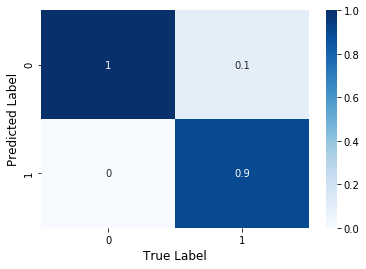

In [51]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [52]:
predicted_val_logi = logi.predict_proba(test)[:, 1]
winner = pd.concat([BB_tamil_participant, pd.DataFrame(predicted_val_logi, columns=['Predicted_Winner'])],axis=1)
winner[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Aajeedh Khalique,0.000132
1,Aari Arjuna,0.000030
2,Anita Sampath,0.000014
3,Bala Murugadoss,0.000021
4,Gabriella Charlton,0.000014
5,Nisha Aranthangi,0.000010
6,Ramesh Jithan,0.000030
7,Rekha,0.000014
8,Ramya Pandian,0.000010
9,Rio Raj,0.000025


## Predicted Winner for Bigg Boss Tamil Season 4, as per Logistic Regression

In [53]:
# Predicted Winner for Bigg Boss Tamil Season 4, as per LogisticRegression
winner.iloc[winner.Predicted_Winner.argmax()]['Name']

'Aajeedh Khalique'

In [54]:
# RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=2019).fit(x_train, y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=2019,
                       verbose=0, warm_start=False)

In [55]:
predicted_val_rf = rf.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_rf > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

# n_estimators=100 accuracy 99.4
# n_estimators=200 accuracy 100

F1 Score - 98.09891243946971
Accuracy Score - 98.24561403508771


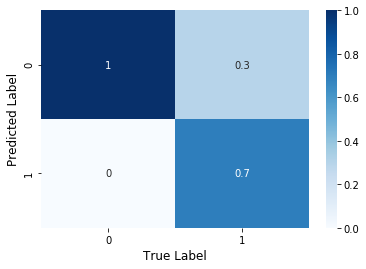

In [56]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [57]:
predicted_val_rf = rf.predict_proba(test)[:,1]
winner = pd.concat([BB_tamil_participant, pd.DataFrame(predicted_val_rf, columns=['Predicted_Winner'])],axis=1)
winner[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Aajeedh Khalique,0.050
1,Aari Arjuna,0.005
2,Anita Sampath,0.000
3,Bala Murugadoss,0.020
4,Gabriella Charlton,0.000
5,Nisha Aranthangi,0.000
6,Ramesh Jithan,0.005
7,Rekha,0.000
8,Ramya Pandian,0.000
9,Rio Raj,0.005


## Predicted Winner for Bigg Boss Tamil Season 4, as per Random Forest

In [58]:
# Predicted Winner for Bigg Boss Tamil Season 4, as per RandomForest
winner.iloc[winner.Predicted_Winner.argmax()]['Name']

'Aajeedh Khalique'

## Neaural Networks (MLP)

In [59]:
NN = MLPClassifier(random_state=2019)
#NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500, 20), random_state=2019)
NN.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2019, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
predicted_val_nn = NN.predict(x_val)
# predicted_val_nn = NN.predict_proba(x_val)[:,1]
# y_predicted_val = (predicted_val_nn > 0.03).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 98.09891243946971
Accuracy Score - 98.24561403508771


In [61]:
predicted_val_nn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

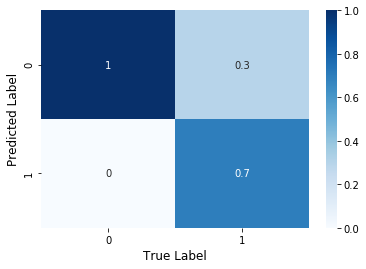

In [62]:
# Confusion Matrix
plot_confusion_matrix()

In [63]:
predicted_val_nn = NN.predict(test)
winner = pd.concat([BB_tamil_participant, pd.DataFrame(predicted_val_nn, columns=['Predicted_Winner'])],axis=1)
winner[['Name','Predicted_Winner']]

,Name,Predicted_Winner
0,Aajeedh Khalique,0.0
1,Aari Arjuna,0.0
2,Anita Sampath,0.0
3,Bala Murugadoss,0.0
4,Gabriella Charlton,0.0
5,Nisha Aranthangi,0.0
6,Ramesh Jithan,0.0
7,Rekha,0.0
8,Ramya Pandian,0.0
9,Rio Raj,0.0


In [64]:
# Predicted Winner for Bigg Boss Tamil Season 4, as per Neaural Networks (Multi Layer Perceptron)
# winner.iloc[winner.Predicted_Winner.argmax()]['Name']